**Task 1:** Read the dataset and do the pre processing

In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
#reading the dataset
data = pd.read_csv('drug200.csv')

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# performing data preprocessing
#checking for null values
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

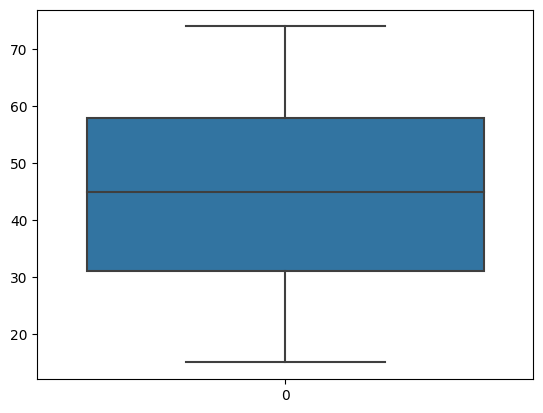

In [ ]:
sns.boxplot(data['Age'])

<Axes: >

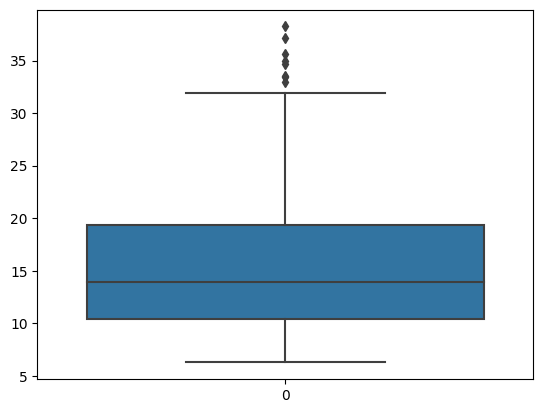

In [ ]:
sns.boxplot(data['Na_to_K'])

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

# Split the data into features and labels
X = data.drop('Drug', axis=1)
y = data['Drug']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task 2:** Build an ANN model with (Input layer, min 3 hidden layers & output layer)

In [ ]:
#building an ANN model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    #Adding the input layer to the model
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    #Adding the 1st hidden layer to the model
    keras.layers.Dense(128, activation='relu'),
    #Adding the 2nd hidden layer to the model
    keras.layers.Dense(64, activation='relu'),
    #Adding the 3rd hidden layer to the model
    keras.layers.Dense(32, activation='relu'),
    #Adding the output layer to the model
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 1.6522 - accuracy: 0.0875
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 1.5481 - accuracy: 0.2625
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.4592 - accuracy: 0.5063
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 1.3576 - accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 1.2304 - accuracy: 0.6875
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0837 - accuracy: 0.6562
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9316 - accuracy: 0.6625
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7836 - accuracy: 0.7563
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.8062
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5387 - accuracy: 0.8375
Epoch 11/100
5/5 [===========

**Task 3:** Test the model with random data

In [ ]:
#Testing the model accuracy with the test data
accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000
Accuracy: [0.0038708082865923643, 1.0]
